# Tarea N°3

### César Cerda Bollmann

In [33]:
install.packages('tidyr')
install.packages('ggplot2')
install.packages('data.table')

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [34]:
library(purrr)
library(ggplot2)
library(data.table)


Attaching package: ‘data.table’


The following object is masked from ‘package:purrr’:

    transpose




## Pregunta N°1

### a) Gráfico la función densidad

In [3]:
x=seq(-10,10,0.1)
y=1:length(x)
for (i in 1:length(x)) {
    if (x[i]<0){
        y[i]=0.5*exp(x[i])
    } else if(x[i]>=0) {     
        y[i]=0.5*exp(-x[i])
    }
}

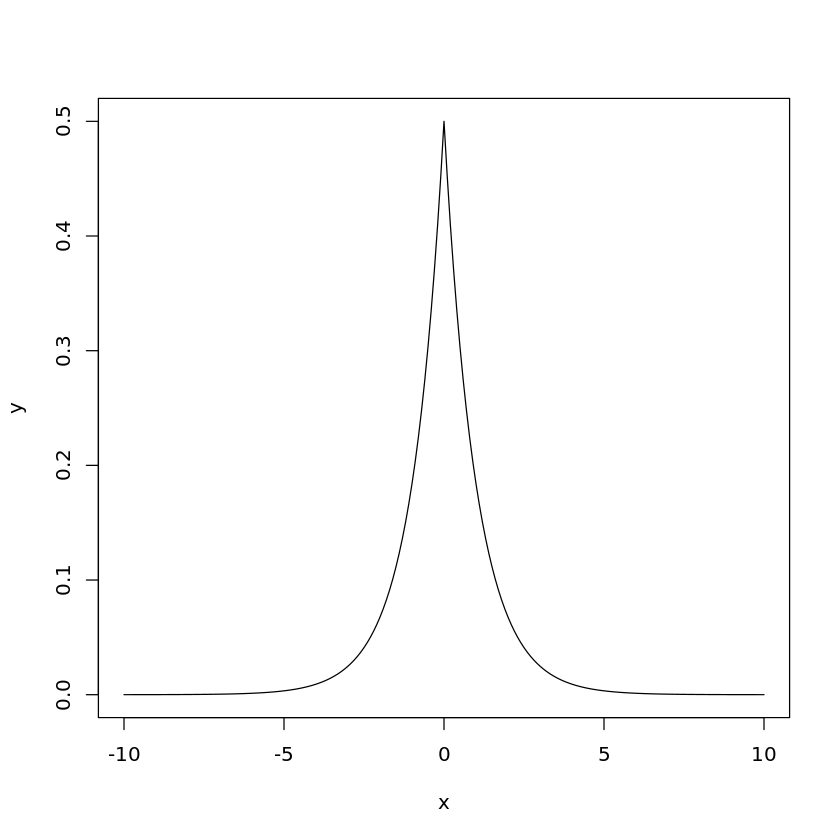

In [4]:
plot(x,y,type='l')

### b)Gráfico de F(x)

In [6]:
X = seq(-10,10,0.1)
F = 1:length(X)
for (i in 1:length(X)){
    if (X[i]<0){
        F[i] = 0.5*exp(X[i])
        }
    if (X[i]>=0){
        F[i]= 1- 0.5*exp(-X[i])
        }
    }

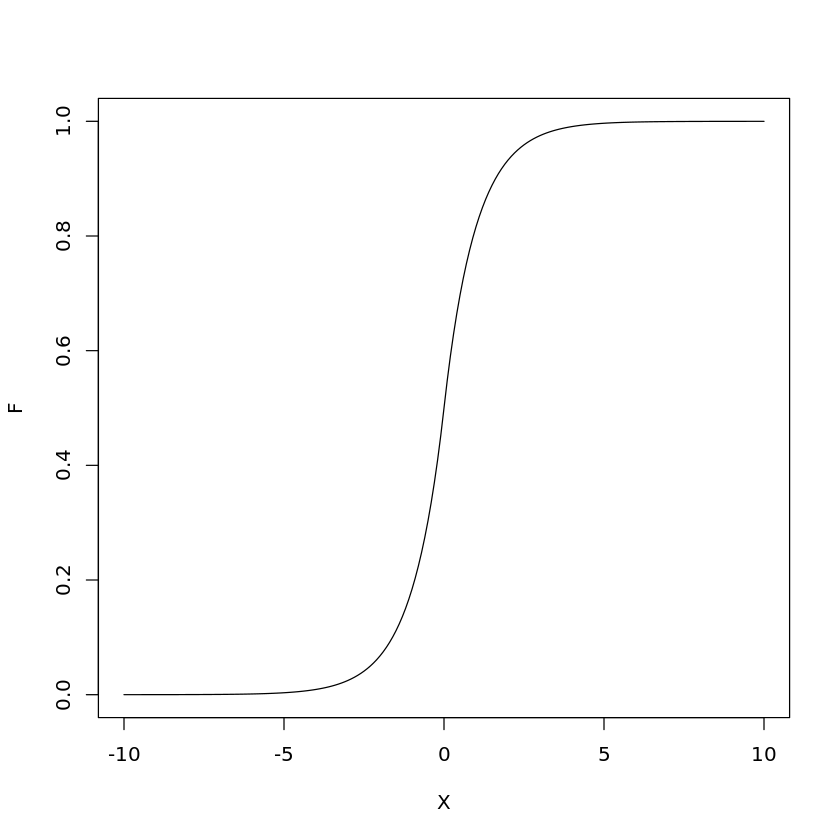

In [7]:
plot(X,F,type='l')

In [14]:
sample_uniform = runif(1000, 0, 1)

In [18]:
sample_F = 1:length(sample_uniform)
for (i in 1:length(sample_uniform)){
    if (sample_uniform[i]<0.5){
        sample_F[i] = log(2*sample_uniform[i])
        }
    if (sample_uniform[i]>=0.5){
        sample_F[i]= -log(2-2*sample_uniform[i])
        }
    }

In [19]:
sample_F_data = data.frame(sample_F)

In [20]:
sample_F_data['sample_F']

sample_F
<dbl>
-1.04769492
-1.91020177
-0.71053797
1.57014990
-0.37857684
0.64550182
0.85370075
-0.59234285
-0.41215582


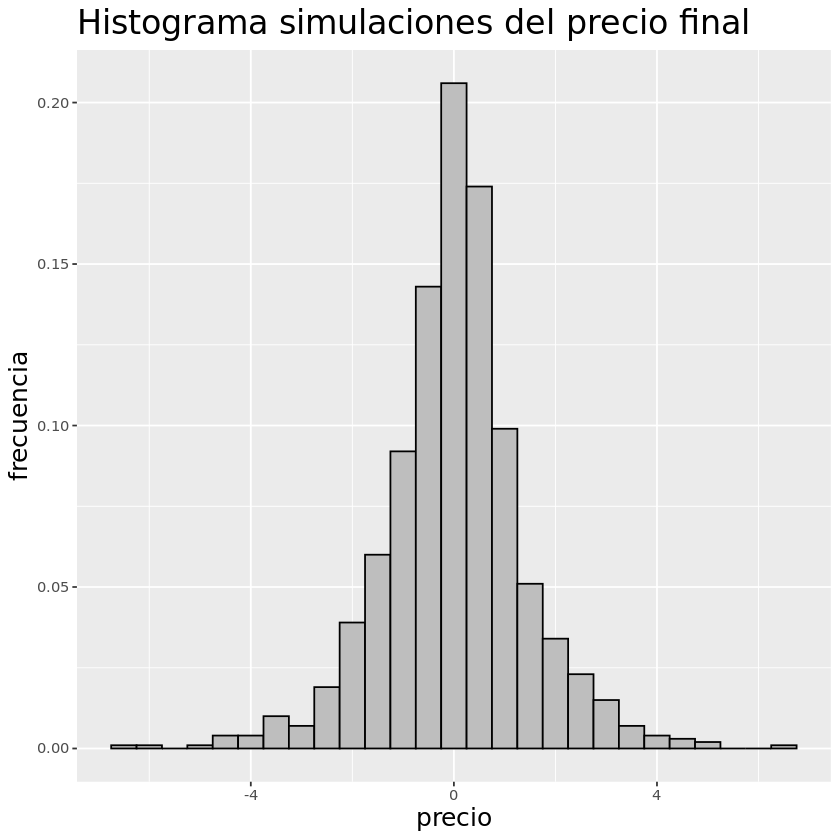

In [38]:
bin <- 0.5
plotfig <- ggplot(sample_F_data,aes(sample_F))+
        theme(plot.title = element_text(size = 20),
              axis.title.y=element_text(size = 15),
              axis.title.x=element_text(size = 15))
 
p <- plotfig+geom_histogram(aes(y = after_stat(count /(sum(count)))), binwidth=bin, color="black", fill="gray")+
       labs(x="precio",
            y="frecuencia",
            title=paste0("Histograma simulaciones del precio final"))

#p <- p+ geom_vline(aes(xintercept=mean(PT)),
#            color="blue", linetype="dashed", size=1)
           
p 

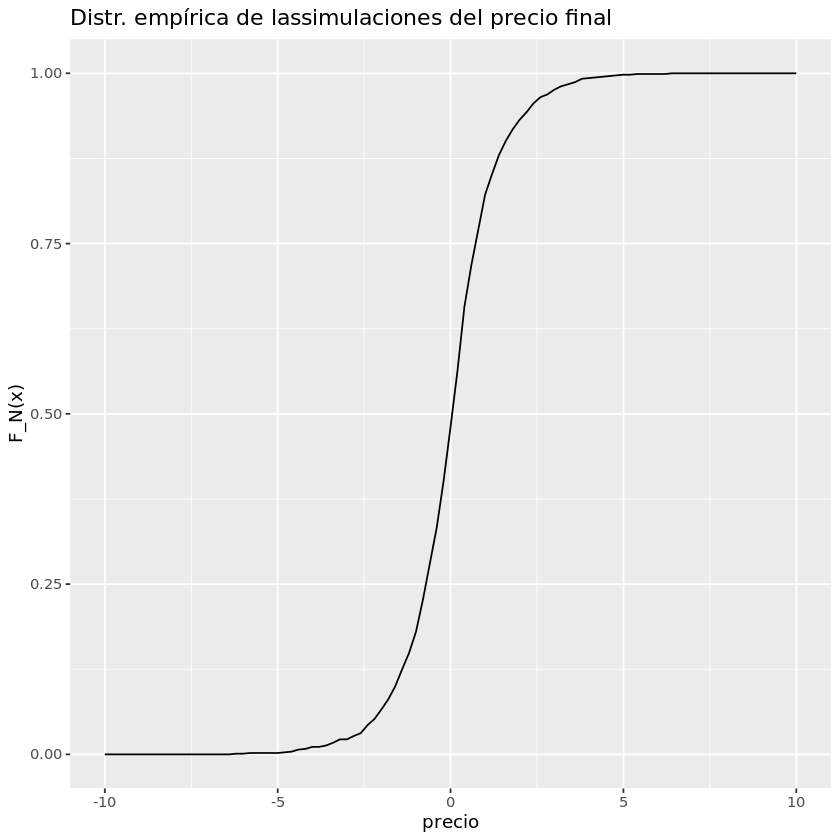

In [22]:
pfin2 = ggplot(sample_F_data,aes(sample_F))+geom_function(fun=ecdf(sample_F))+
         xlim(-10,10)+
         labs(x="precio",y="F_N(x)",
              title=paste0("Distr. empírica de lassimulaciones del precio final")) 
pfin2

In [ ]:
test2 = function(x) {ifelse(x<0, 1, 2)}

In [33]:
test3 = function(x) {ifelse(x<0, 0.5*exp(x),1- 0.5*exp(-x))}

In [24]:
test2 = function(x) { if (x<0){
    x=1
    }else{x=3}
    }

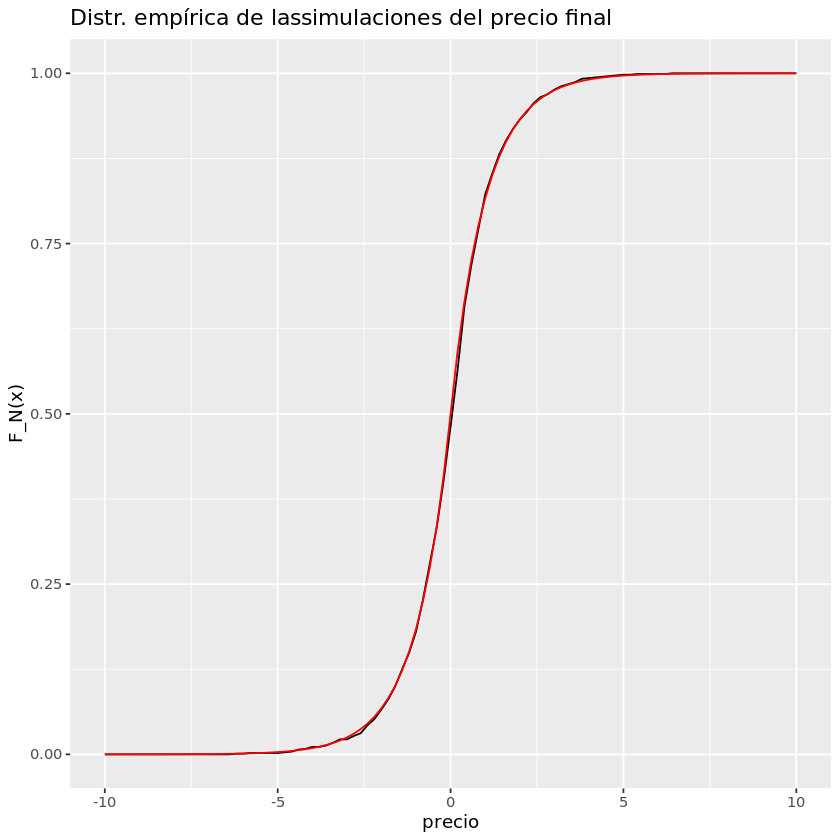

In [61]:
pfin3 = pfin2 + stat_function(fun = test3, color="red")
pfin3

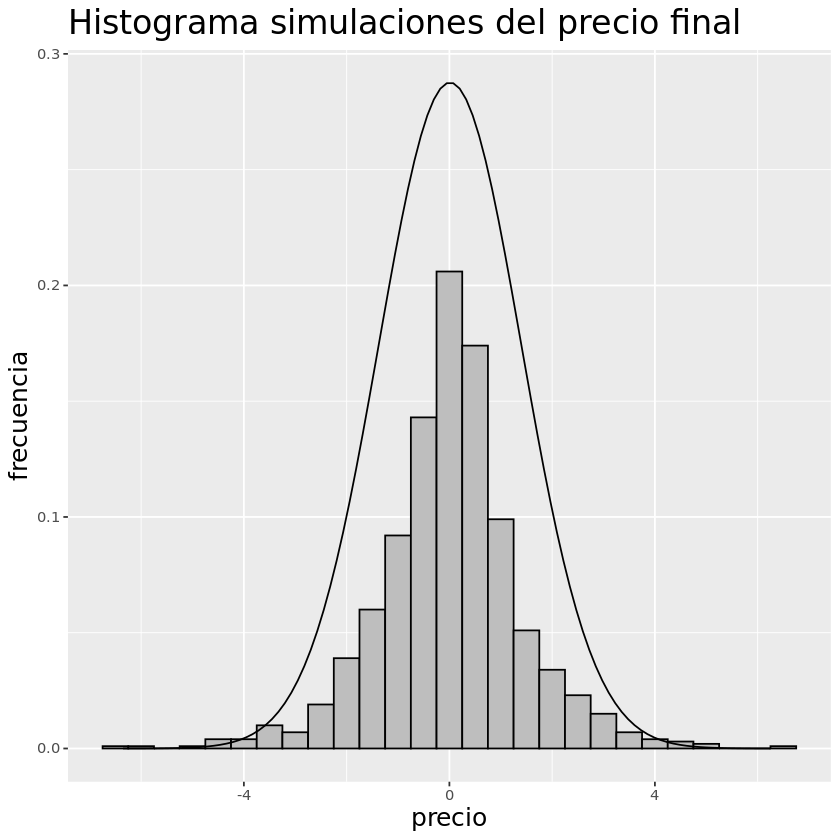

In [59]:
p+geom_function(fun = dnorm, args = list(mean = 0.01226, sd = 1.387))

In [ ]:
pfin4 =pfin3+stat_function(fun = pnorm, n = 1000, args = list(mean = 0.01226, sd = 1.387), color = "green") 

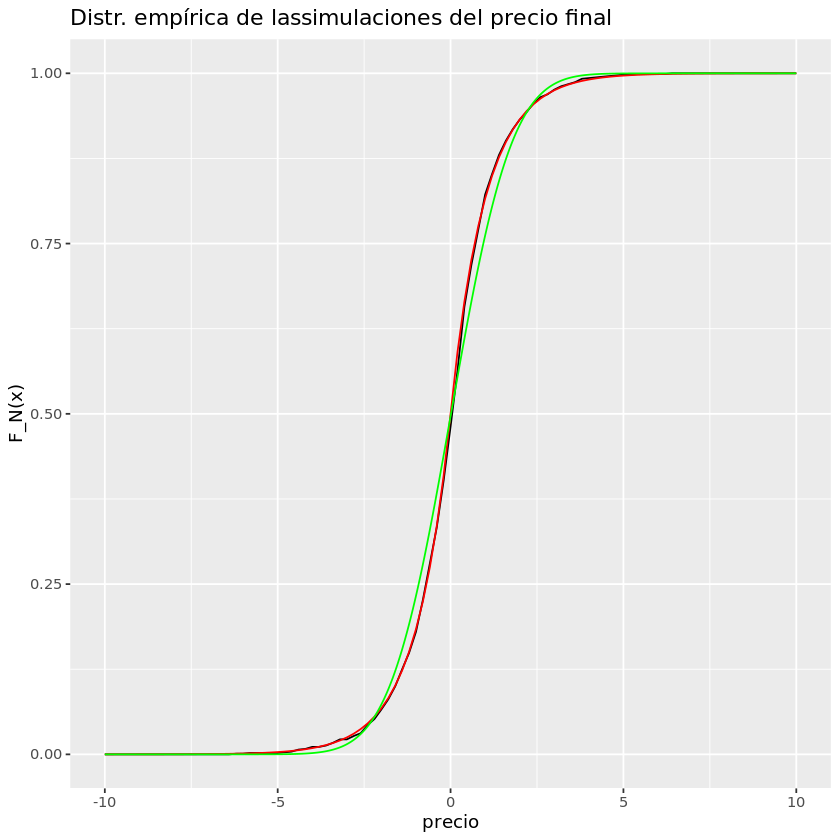

In [67]:
pfin4

In [41]:
media =mean(sample_F)
media

[1] 0.01225856

In [44]:
stdrd =sd(sample_F)
stdrd

[1] 1.386995

In [70]:
pfin5 = pfin3+geom_function(fun=pnorm, args = list(mean = 0.01226, sd = 1.387), color="red")

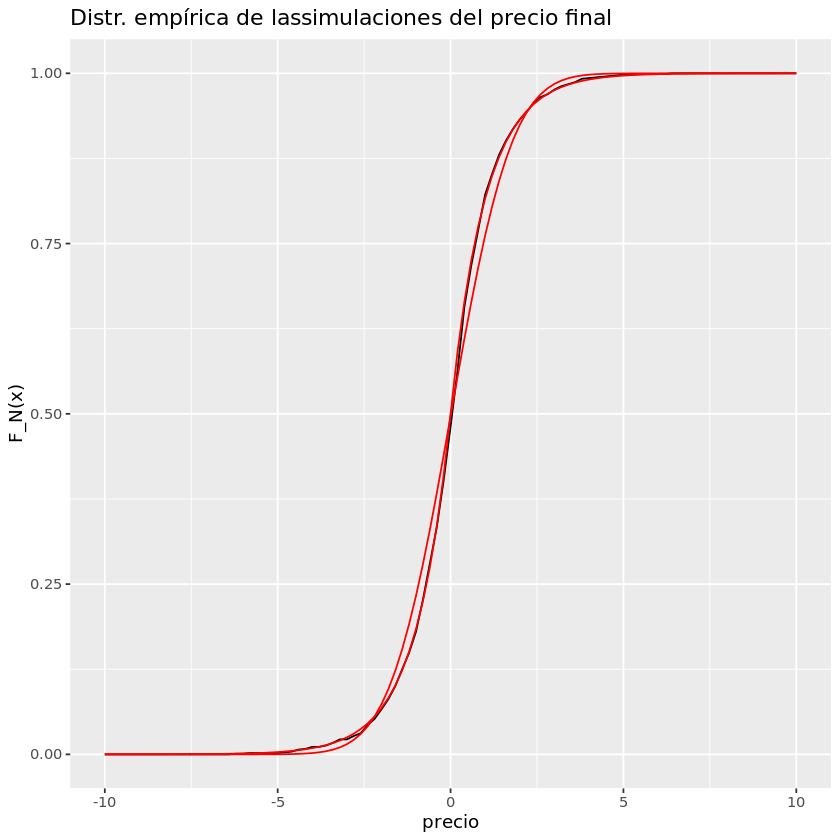

In [71]:
pfin5

## Pregunta N°2

### a) Test-t independiente

In [1]:
install.packages("readxl")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [2]:
library(readxl)

#### Nos interesa evaluar cual política de inventario es mejor.  Para esto se plantea la siguiente hipótesis
#### Ho : u(400) >= u(300)
#### Ha : u(400) < u(300)

In [12]:
data = read_excel("data_independiente.xlsx")
data = as.data.frame(data)

In [13]:
dat400 = data$Ss_400
dat300 = data$Ss_300

In [14]:
res.ftest = var.test(dat400, dat300, data = data)
res.ftest


	F test to compare two variances

data:  dat400 and dat300
F = 1.816, num df = 999, denom df = 999, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.604041 2.055892
sample estimates:
ratio of variances 
          1.815967 


#### p-value < 2.2e-16 < 0.05, por lo que no hay evidencia para decir que las varianzas son iguales.  Suponemos entonces que las varianzas son distintas

In [15]:
res = t.test(dat400, dat300, alternative = "less", var.equal = FALSE)
res


	Welch Two Sample t-test

data:  dat400 and dat300
t = 1.4015, df = 1843.2, p-value = 0.9194
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 15549.83
sample estimates:
mean of x mean of y 
   259524    252372 


#### como p-value = 0.9194, no existe evidencia para rechazar la hipótesis nula

### b) Comparación utilizando un test-t pareado, aplicado a simulaciones independientes de las dos configuraciones

In [ ]:
#Se crea una nueva variable aleatoria dif_dat=dat400 - dat300
dif_dat = dat400-dat300

#### Nos interesa saber si la u(dif_dat) >= 0.  Se genera la siguiente hipótesis:
#### Ho : u(dif_dat) >= 0
#### Ha : u(dif_dat) < 0

In [22]:
res_b = t.test(dat400, dat300, paired = TRUE,  alternative = "less")
res_b


	Paired t-test

data:  dat400 and dat300
t = 1.4107, df = 999, p-value = 0.9207
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 15498.74
sample estimates:
mean of the differences 
                   7152 


### c) test-t pareado, aplicado a simulaciones generadas con los mismos números aleatorios

In [2]:
data_c = read_excel("ModeloP2(Demanda unica).xlsx", sheet = "Simulation Data Dump 1&2")
data_c = as.data.frame(data_c)

ERROR: Error in read_excel("ModeloP2(Demanda unica).xlsx", sheet = "Simulation Data Dump 1&2"): could not find function "read_excel"


In [20]:
dat400c = data_c$Ss400
dat300c = data_c$Ss300

In [4]:
res_c = t.test(dat400c, dat300c, paired = TRUE,  alternative = "less")
res_c

ERROR: Error in t.test(dat400c, dat300c, paired = TRUE, alternative = "less"): object 'dat400c' not found


In [5]:
stock_data = read.csv("prices4stocks.csv", sep=",")

In [14]:
summary(stock_data)

      Day               A               B               C         
 Min.   :  1.00   Min.   :28.28   Min.   :32.51   Min.   : 85.38  
 1st Qu.: 63.75   1st Qu.:30.96   1st Qu.:39.55   1st Qu.: 94.61  
 Median :126.50   Median :33.31   Median :44.99   Median :101.49  
 Mean   :126.50   Mean   :35.75   Mean   :44.95   Mean   :102.64  
 3rd Qu.:189.25   3rd Qu.:40.79   3rd Qu.:48.77   3rd Qu.:107.78  
 Max.   :252.00   Max.   :51.78   Max.   :61.97   Max.   :127.94  
       D        
 Min.   :48.12  
 1st Qu.:54.27  
 Median :67.01  
 Mean   :66.33  
 3rd Qu.:76.93  
 Max.   :94.10  

In [20]:
largo=length(stock_data$A)
largo

[1] 252

In [24]:
head(stock_data)

,Day,A,B,C,D
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,29.77,39.06,85.38,70.56
2,2,30.56,38.50,87.03,72.84
3,3,31.02,34.95,88.19,61.95
4,4,31.92,37.35,90.85,61.87
5,5,32.84,38.14,91.19,61.95
6,6,34.05,38.87,92.66,61.44


In [23]:
stock_data$A[1]

[1] 29.77

In [56]:
for (i in 1:largo){
    logA[i] = log(stock_data$A[i+1]/stock_data$A[i])
    logB[i] = log(stock_data$B[i+1]/stock_data$B[i])
    logC[i] = log(stock_data$C[i+1]/stock_data$C[i])
    logD[i] = log(stock_data$D[i+1]/stock_data$D[i])
    }

In [102]:
sd_A=sd(logA, na.rm=TRUE)
sd_B=sd(logB, na.rm=TRUE)
sd_C=sd(logC, na.rm=TRUE)
sd_D=sd(logD, na.rm=TRUE)

In [114]:
medA=mean(logA,na.rm=TRUE)
medB=mean(logB,na.rm=TRUE)
medC=mean(logC,na.rm=TRUE)
medD=mean(logD,na.rm=TRUE)

In [115]:
drift_A= medA+sd_A^2/2
drift_B= medB+sd_B^2/2
drift_C= medC+sd_C^2/2
drift_D= medD+sd_D^2/2

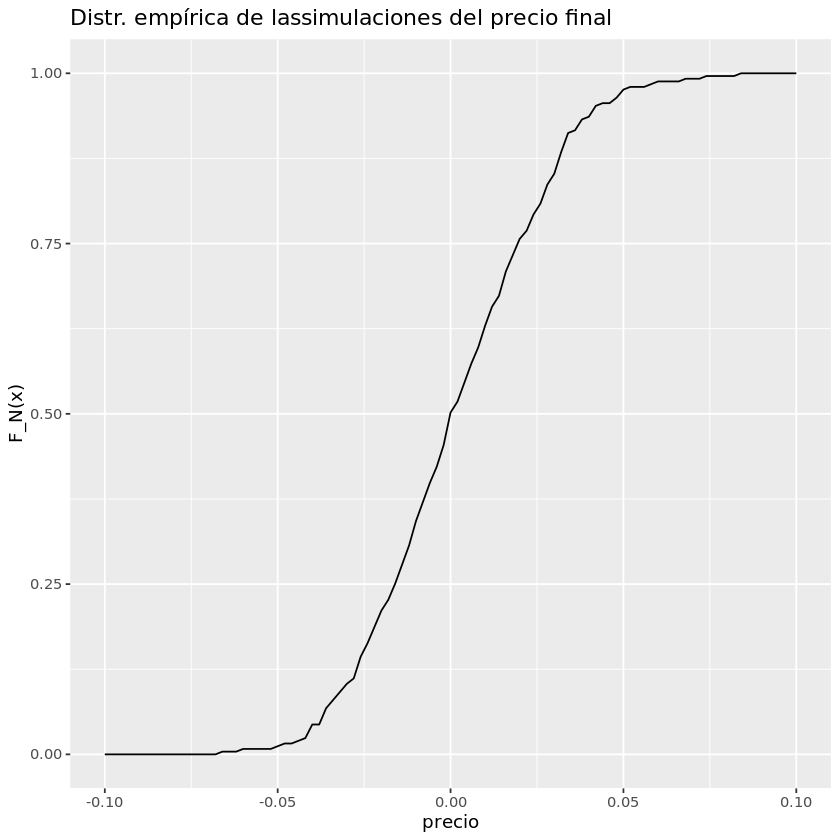

In [116]:
plotA = ggplot(data.frame(logA),aes(logA))+geom_function(fun=ecdf(logA))+
         xlim(-0.1,0.1)+
         labs(x="precio",y="F_N(x)",
              title=paste0("Distr. empírica de lassimulaciones del precio final")) 
plotA

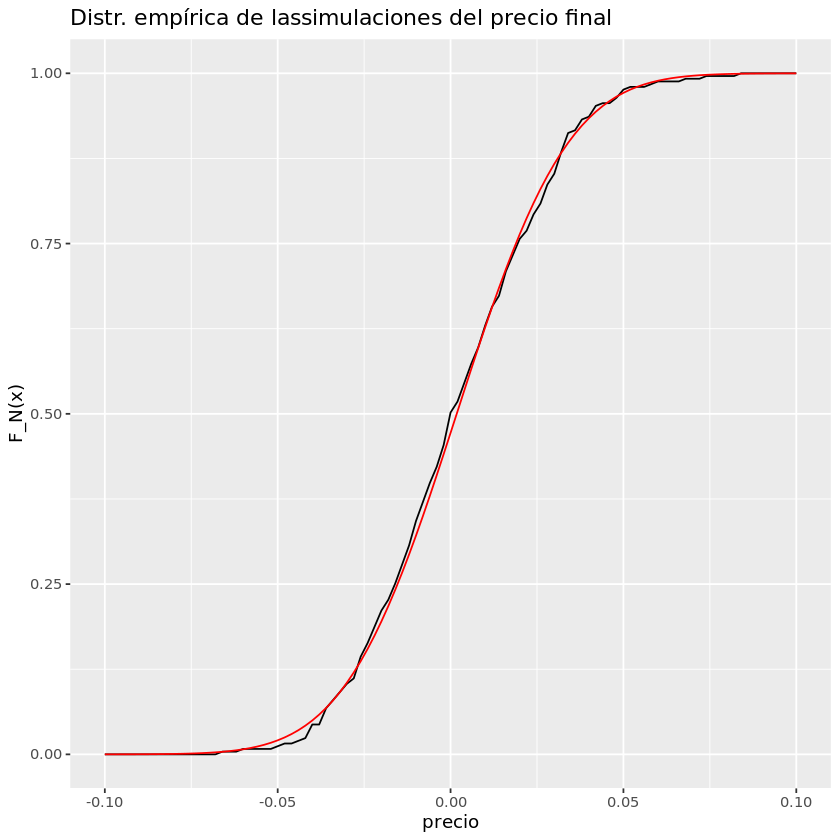

In [117]:
plotA2 = plotA + geom_function(fun=pnorm, args = list(mean = medA, sd = sd_A), color="red")
plotA2

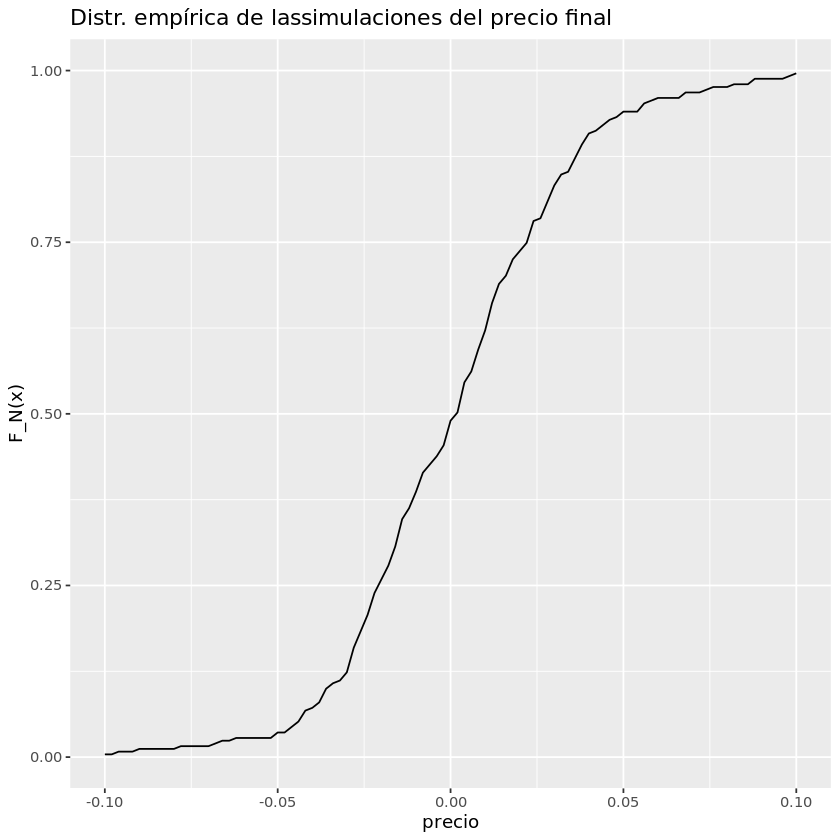

In [118]:
plotB = ggplot(data.frame(logB),aes(logB))+geom_function(fun=ecdf(logB))+
         xlim(-0.1,0.1)+
         labs(x="precio",y="F_N(x)",
              title=paste0("Distr. empírica de lassimulaciones del precio final")) 
plotB

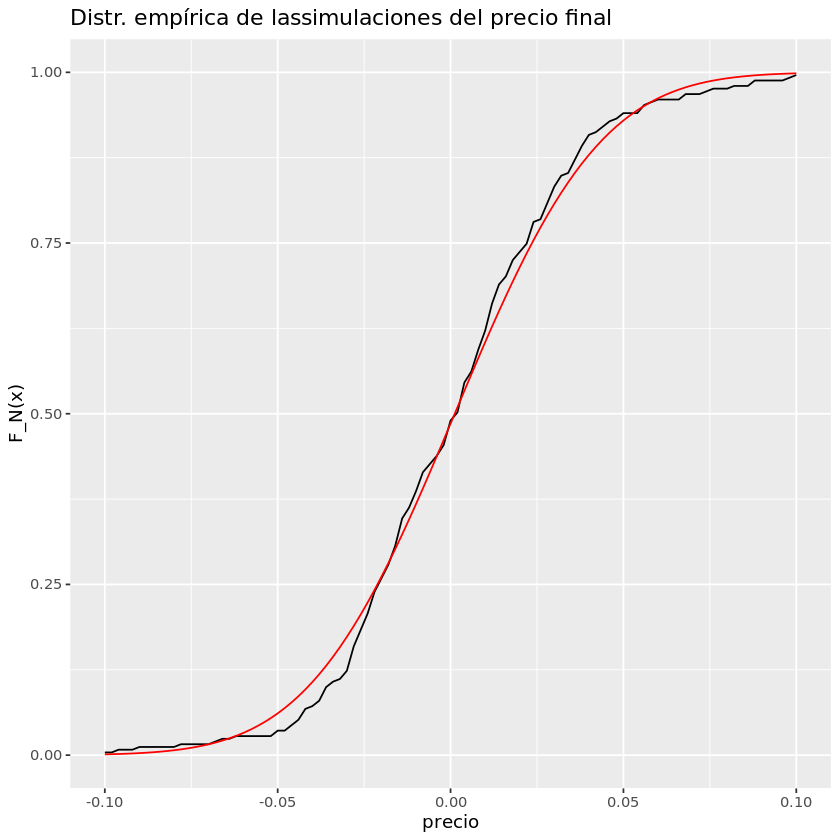

In [119]:
plotB2 = plotB + geom_function(fun=pnorm, args = list(mean = medB, sd = sd_B), color="red")
plotB2

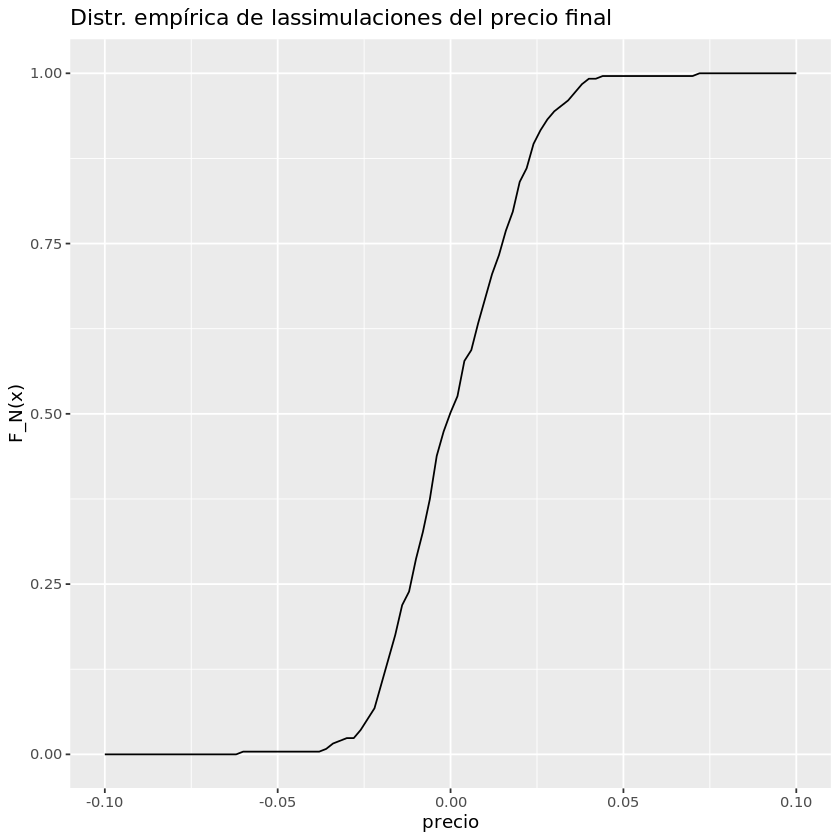

In [120]:
plotC = ggplot(data.frame(logC),aes(logC))+geom_function(fun=ecdf(logC))+
         xlim(-0.1,0.1)+
         labs(x="precio",y="F_N(x)",
              title=paste0("Distr. empírica de lassimulaciones del precio final")) 
plotC

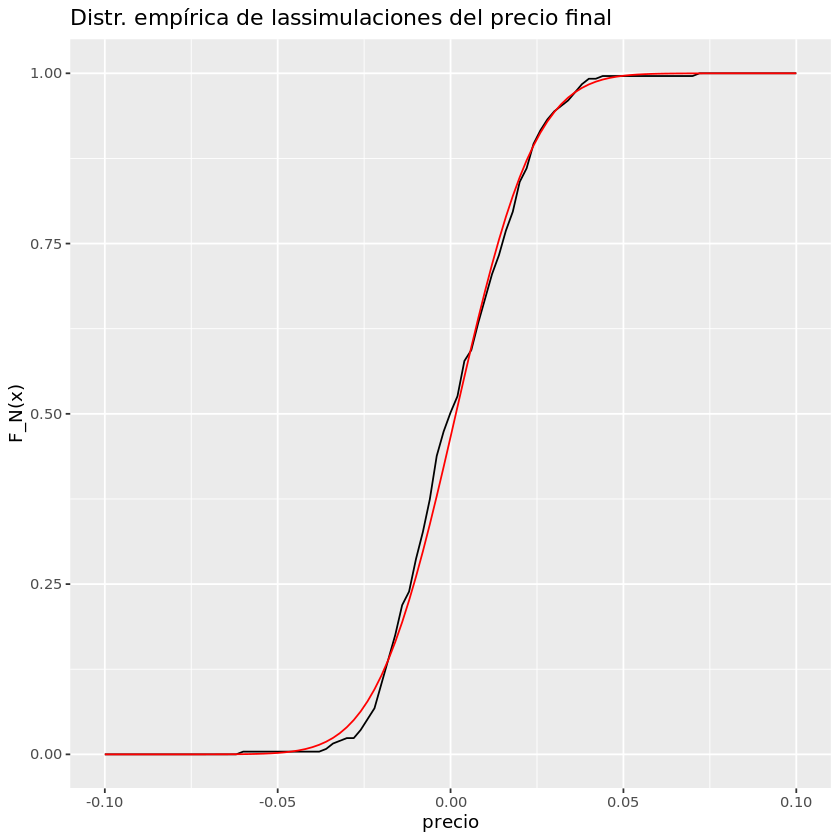

In [121]:
plotC2 = plotC + geom_function(fun=pnorm, args = list(mean = medC, sd = sd_C), color="red")
plotC2

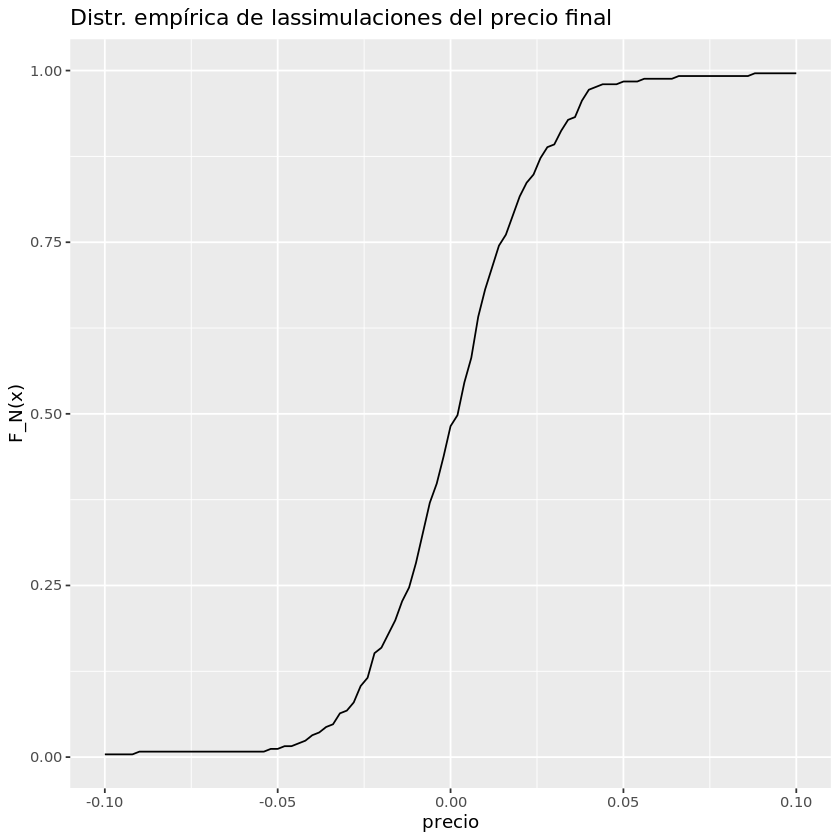

In [127]:
plotD = ggplot(data.frame(logD),aes(logD))+geom_function(fun=ecdf(logD))+
         xlim(-0.1,0.1)+
         labs(x="precio",y="F_N(x)",
              title=paste0("Distr. empírica de lassimulaciones del precio final")) 
plotD

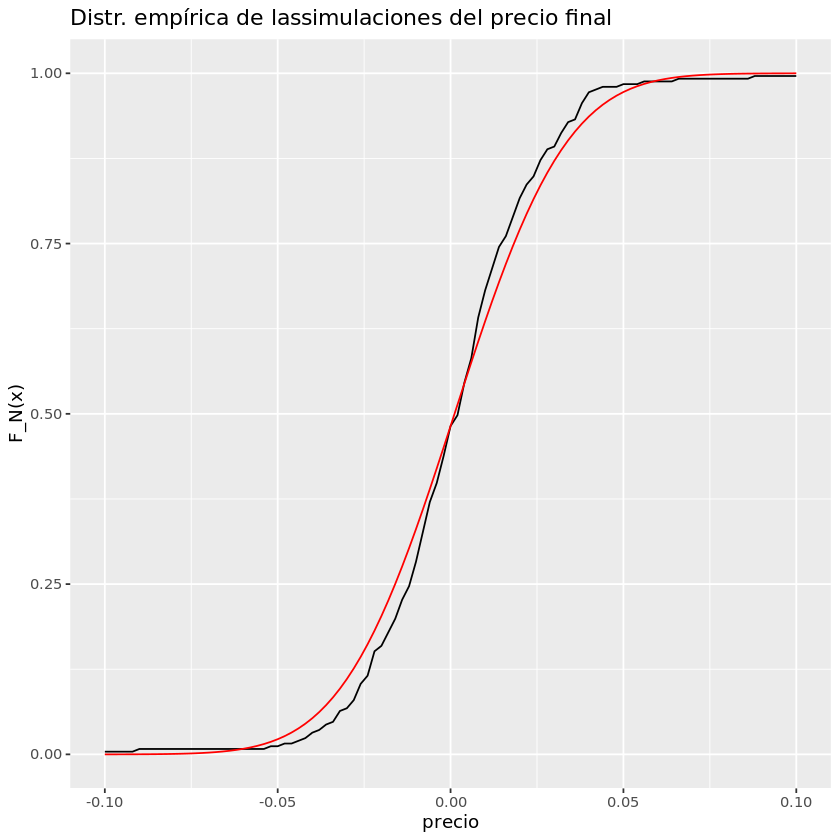

In [125]:
plotD2 = plotD + geom_function(fun=pnorm, args = list(mean = medD, sd = sd_D), color="red")
plotD2

### b) Porftafolio

In [133]:
N = 500
T = 180
P0A=46.57
P0B=52.89
P0C=125.53
P0D=94.1
log_cambio_A = (drift_A-sd_A^2/2)*T + sd_A*sqrt(T)*rnorm(N,0,1)
PTA = P0A*exp(log_cambio_A)
log_cambio_B = (drift_B-sd_B^2/2)*T + sd_B*sqrt(T)*rnorm(N,0,1)
PTB = P0B*exp(log_cambio_B)
log_cambio_C = (drift_C-sd_C^2/2)*T + sd_C*sqrt(T)*rnorm(N,0,1)
PTC = P0C*exp(log_cambio_C)
log_cambio_D = (drift_D-sd_D^2/2)*T + sd_D*sqrt(T)*rnorm(N,0,1)
PTD = P0D*exp(log_cambio_C)

Se define una nueva variable aleatoria que es el valor de Portafolio de acuerdo a lo siguiente:

In [137]:
Portafolio = 120*PTA+300*PTB+200*PTC+150*PTD

[1]  63802.59  68394.50  65268.65 100374.82  58406.08  81213.73  75760.24
  [8] 104207.49  92315.69  94943.58  97857.67  77126.87  70496.02  72051.43
 [15]  75893.43  92727.18  73973.48  83269.14  72945.38  76268.25  78703.26
 [22]  73760.19  80307.52  83620.78  74876.74  89187.61  81082.24  64009.87
 [29]  95094.97  65386.00  91311.08  62595.97  87909.40  94491.05  75211.50
 [36]  91486.09  99481.00  76735.56  92487.07  82370.79  90139.42  71147.17
 [43]  88202.84  82976.70  76897.08  92162.31  76175.84  84348.65  88137.90
 [50]  89889.10  69289.20  82970.46  77986.23  83888.72 100542.41  60077.37
 [57]  81981.63 119873.51  90192.54  90249.90  81282.33  85903.80  87665.86
 [64] 106738.30  70409.38  90155.30  90373.20  60307.62  82518.91 136696.08
 [71]  81899.68  91690.63  69606.42 118366.55  78302.19  85895.16  72535.98
 [78] 101799.42  66634.12  97558.93  50935.07  80574.69  74158.47  79047.63
 [85] 100578.98 107403.64  65417.23  82741.29  89598.89  68123.22  69925.17
 [92]  71566.28  61380.72  79063.28  77892.60  78198.44  51691.38  74018.43
 [99]  61024.58 101533.27 110386.17  77663.95  54106.46 115518.29  83761.41
[106]  82851.38 105129.76  77958.82  91199.62  63615.55  73643.24  66378.53
[113]  88245.11 104226.63  68682.78  89463.35  80833.85  77222.24  78616.11
[120]  71147.52  76089.88  67480.36  84856.06  88672.37  61790.17  94899.42
[127]  60072.54 118092.48  84179.77 125820.24  74854.15  91824.21 102107.92
[134]  84084.58  58277.19  77074.83  66554.22  83059.97  82389.70  75407.29
[141]  67974.79 104237.24  83930.50  62849.52  79408.00  73797.24  62353.15
[148]  63761.04  66916.62  78648.56 111391.59  94915.55  97123.90  68395.33
[155]  93788.36  72044.37 131473.33  84879.32  91666.77  67881.24  82440.81
[162] 102626.07 101800.94  72458.85 108669.03  62359.83  79607.15  76226.07
[169]  99312.59 103641.32  79771.21  59022.99  86745.68  64504.75  66464.55
[176]  76295.10  85482.56  88502.40  77840.24  59714.53  92587.24 102868.92
[183]  88382.61  63644.36  84614.85  92471.55  63298.73  59829.22  71988.96
[190]  79346.07  59423.74  73729.76  96210.06  92532.44  69522.19  68018.56
[197]  83221.55  97973.26 101833.81  80227.75  81561.17 107286.70  72203.07
[204]  57861.61  68470.05  55839.09  80061.75  84536.26  63699.47  72614.48
[211] 101300.90 159244.77  69516.30  69892.33  75542.31  78522.20  64108.35
[218]  88335.19 102835.54  72339.47  95483.69 107275.31  87064.71  65344.17
[225]  80154.34  89504.31  92545.19  66236.07  78997.59  81792.92  62107.12
[232]  71902.94  59755.06  84535.75  67466.50  73620.35  70154.27  76426.58
[239]  62421.40  81899.57 105737.99  57555.81 100085.34 104183.72  63170.31
[246]  80262.37  89360.48  97883.16  92405.17  95274.12  51229.28  96388.40
[253]  91271.13 112186.52  84203.64  84151.19  76223.57  74963.51  76218.30
[260]  95210.30 101454.47 113689.57  79788.91  64431.02  97406.15  76338.37
[267]  81142.76  67769.30  69954.17  63515.67  81332.45 110497.75 105619.26
[274]  88050.89  58254.32  88564.28  77289.43  78477.59  62715.58  66224.61
[281]  67237.62  71820.15  61297.40  75821.58  65435.55  93143.40  67564.92
[288] 101600.43 102641.84  89400.62  80568.71  79825.29  92579.40  89769.43
[295]  81137.81  71022.66  66313.92  74794.06  77273.79  76055.41  78963.55
[302]  64444.19  83226.99  71562.23  88243.59  69028.23  90334.52  70877.30
[309]  85704.32 104009.42  80726.08  98417.56  65899.83  57219.68  72473.30
[316]  95709.91  70650.02  72853.10  70956.11  80882.65  84172.44  88582.69
[323]  64721.63  69432.42  62488.49  75811.49  74726.52  69076.02  72606.34
[330]  95908.38  70360.75  95907.46  80823.10  86218.54  70637.23  75936.65
[337]  72304.88  74753.99  73419.46  84943.44 105304.92  96546.73  83137.83
[344]  64298.19  86265.03 104822.57  98884.79 102591.82  70999.45  69602.02
[351]  82085.55  72523.84  93191.12  88672.85  79804.74  97128.02  67821.16
[358]  78130.33  86309.15  87599.76  92802.67  75125.40 101543.46  66970.41
[365]  82646.13  98220.50  87640.55  86383.53  883